In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv("C:/Users/waghm/Downloads/Customers.csv")
products_df = pd.read_csv("C:/Users/waghm/Downloads/Products.csv")
transactions_df = pd.read_csv("C:/Users/waghm/Downloads/Transactions.csv")

In [3]:
# Overview of datasets

In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [6]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   TransactionID                                                  1000 non-null   object 
 1   CustomerID                                                     1000 non-null   object 
 2   ProductID                                                      1000 non-null   object 
 3   TransactionDate                                                1000 non-null   object 
 4   Quantity                                                       1000 non-null   int64  
 5   TotalValue                                                     1000 non-null   float64
 6   Price                                                          1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [7]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,10-07-2022
1,C0002,Elizabeth Lutz,Asia,13-02-2022
2,C0003,Michael Rivera,South America,07-03-2024
3,C0004,Kathleen Rodriguez,South America,09-10-2022
4,C0005,Laura Weber,Asia,15-08-2022


In [8]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [9]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,25-08-2024,1,300.68,300.68
1,T00112,C0146,P067,27-05-2024,1,300.68,300.68
2,T00166,C0127,P067,25-04-2024,1,300.68,300.68
3,T00272,C0087,P067,26-03-2024,2,601.36,300.68
4,T00363,C0070,P067,21-03-2024,3,902.04,300.68


In [10]:
# Check missing values

In [11]:
print(customers_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [12]:
print(products_df.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [13]:
print(transactions_df.isnull().sum())

TransactionID                                                    0
CustomerID                                                       0
ProductID                                                        0
TransactionDate                                                  0
Quantity                                                         0
TotalValue                                                       0
Price                                                            0
dtype: int64


In [14]:
# Convert date columns

In [15]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], format='%d-%m-%Y', errors='coerce')

In [16]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [17]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], format='%d-%m-%Y', errors='coerce')

In [18]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68


In [19]:
# Exploratory Data Analysis (EDA)

In [20]:
# Total customers
total_customers = customers_df['CustomerID'].nunique()
total_customers

200

In [21]:
# Customers by region
region_distribution = customers_df['Region'].value_counts()
region_distribution

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [22]:
# Signup trends over time
signup_trends = customers_df['SignupDate'].dt.year.value_counts().sort_index()
signup_trends

SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64

In [23]:
# Products by category
category_distribution = products_df['Category'].value_counts()
category_distribution

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [24]:
# Top 5 most expensive products
most_expensive_products = products_df.sort_values(by='Price', ascending=False).head(5)
most_expensive_products

,ProductID,ProductName,Category,Price
74,P075,TechPro Textbook,Books,497.76
31,P032,BookWorld Cookbook,Books,488.63
44,P045,SoundWave T-Shirt,Clothing,481.78
16,P017,ActiveWear Textbook,Books,469.77
36,P037,SoundWave Smartwatch,Electronics,459.86


In [25]:
# Total revenue
total_revenue = transactions_df['TotalValue'].sum()
total_revenue

np.float64(689995.56)

In [26]:
# Top customers by revenue
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_customers

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64

In [27]:
# Revenue trends
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
transactions_df['YearMonth']

0      2024-08
1      2024-05
2      2024-04
3      2024-03
4      2024-03
        ...   
995    2024-10
996    2024-06
997    2024-04
998    2024-09
999    2024-04
Name: YearMonth, Length: 1000, dtype: period[M]

In [28]:
monthly_revenue = transactions_df.groupby('YearMonth')['TotalValue'].sum()
monthly_revenue

YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

In [29]:
products_df.rename(columns={'Price': 'ProductPrice'}, inplace=True)

In [30]:
# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

In [31]:
merged_df.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearMonth,CustomerName,Region,SignupDate,ProductName,Category,ProductPrice
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,2024-08,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,2024-05,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,2024-04,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,2024-03,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,2024-03,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26,1,300.68,300.68,2024-12,Anna Ball,South America,2022-05-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24,3,902.04,300.68,2024-11,Jeremy Mclaughlin,South America,2024-09-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22,1,300.68,300.68,2024-09,David Li,North America,2024-01-13,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07,3,902.04,300.68,2024-12,Miguel Wong,North America,2024-01-30,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14,2,601.36,300.68,2024-05,Robert Jones,South America,2023-04-19,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [32]:
# Revenue by region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum()
region_revenue

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

In [33]:
# Revenue by category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum()
category_revenue

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64

In [34]:
# Bar Chart: Customers by Region

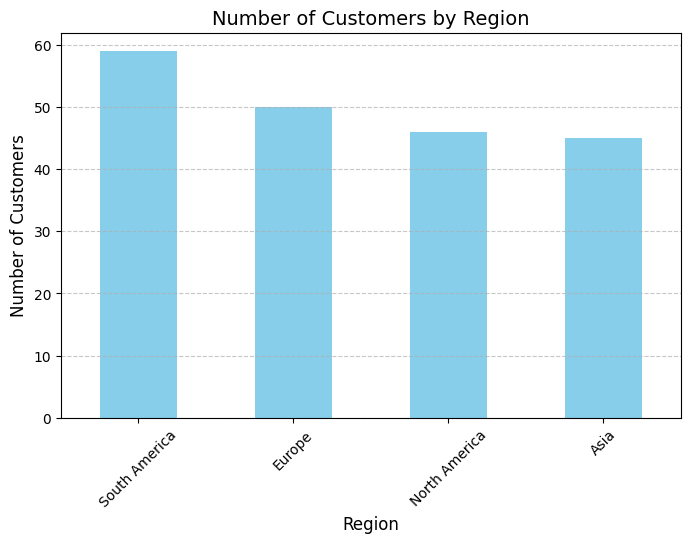

In [35]:
region_counts = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
# Line Chart: Revenue Trends Over Time

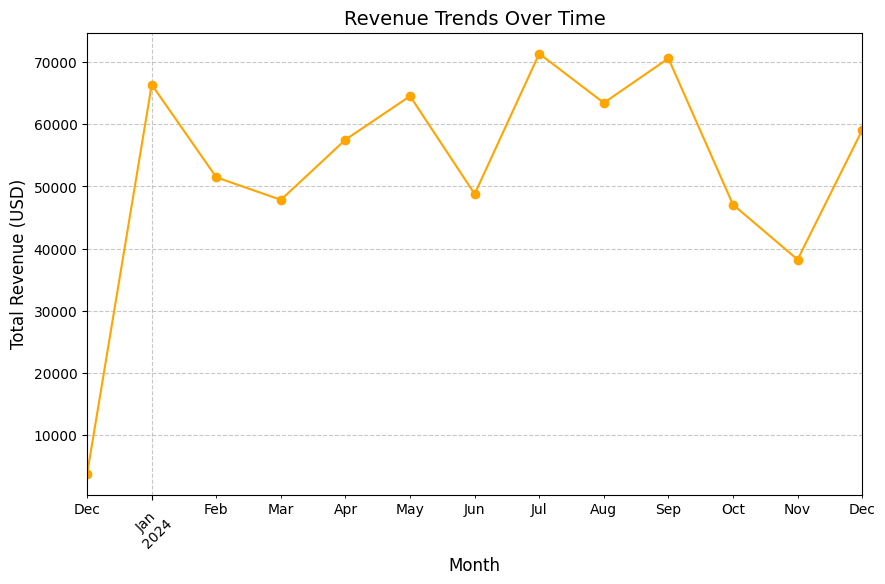

In [37]:
revenue_trends = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(10, 6))
revenue_trends.plot(kind='line', marker='o', color='orange')
plt.title('Revenue Trends Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [38]:
# Heatmap: Correlation Matrix

In [39]:
merged_df.columns = merged_df.columns.str.strip()
print(merged_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'YearMonth', 'CustomerName',
       'Region', 'SignupDate', 'ProductName', 'Category', 'ProductPrice'],
      dtype='object')


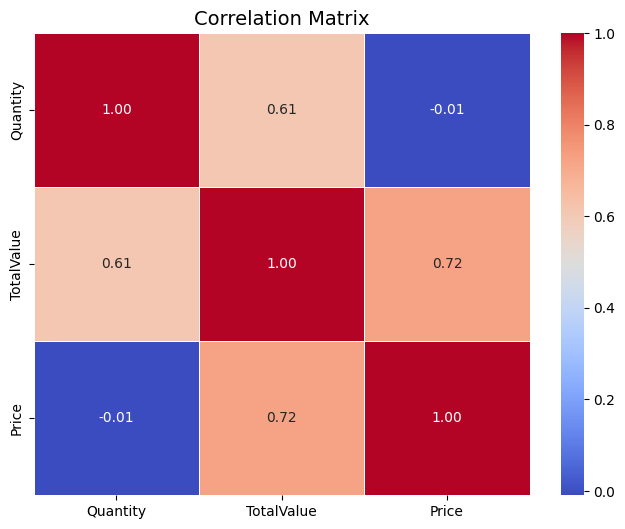

In [40]:
# Selecting numeric columns
numeric_data = merged_df[['Quantity', 'TotalValue', 'Price']]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()